## Question 3: Which industries thrive on Social Media?


In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('socialinsider_data_v2_240303.csv')

In [3]:
df2= df.copy()

# Identify rows where only one number was scraped
#df2[~df2['FOLLOWERS EVOLUTION'].str.contains(' ')]

# Manual cleaning of values scraped incorrectly

df_temp = (df['PLATFORM'] == 'Facebook') & (df['PROFILE'] == 'adidas')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '33,368 0.08%'

df_temp = (df['PLATFORM'] == 'TikTok') & (df['PROFILE'] == 'CHANEL')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '1,311 1.94%'

df_temp = (df['PLATFORM'] == 'Facebook') & (df['PROFILE'] == 'Dior')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '16,750 0.09%'

df_temp = (df['PLATFORM'] == 'Facebook') & (df['PROFILE'] == 'PrettyLittleThing')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '906 0.03%'

df_temp = (df['PLATFORM'] == 'Instagram') & (df['PROFILE'] == 'PrettyLittleThing')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '33,904 0.19%'

df_temp = (df['PLATFORM'] == 'TikTok') & (df['PROFILE'] == 'PrettyLittleThing')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '513 0.02%'

df_temp = (df['PLATFORM'] == 'YouTube') & (df['PROFILE'] == 'PrettyLittleThing')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '3,000 0.59%'

df_temp = (df['PLATFORM'] == 'TikTok') & (df['PROFILE'] == 'UNIQLO')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '202 0.37%'

df_temp = (df['PLATFORM'] == 'Instagram') & (df['PROFILE'] == 'Nutella')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-559 -0.03%'

df_temp = (df['PLATFORM'] == 'Facebook') & (df['PROFILE'] == 'Starbucks')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-22,134 -0.06%'

df_temp = (df['PLATFORM'] == 'Instagram') & (df['PROFILE'] == 'BURST Oral Care')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-186 -0.15%'

df_temp = (df['PLATFORM'] == 'Instagram') & (df['PROFILE'] == 'JUST Egg')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-145 -0.06%'

df_temp = (df['PLATFORM'] == 'Instagram') & (df['PROFILE'] == 'Pretzilla® Soft Pretzel Bread')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-27 -0.2%'

df_temp = (df['PLATFORM'] == 'Twitter') & (df['PROFILE'] == 'Airbnb')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-412 -0.05%'

df_temp = (df['PLATFORM'] == 'Twitter') & (df['PROFILE'] == 'Expedia')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-267 -0.06%'

df_temp = (df['PLATFORM'] == 'Twitter') & (df['PROFILE'] == 'Trivago')
df2.loc[df_temp,'FOLLOWERS EVOLUTION'] = '-170 -0.12%'

assert len(df2[~df2['FOLLOWERS EVOLUTION'].str.contains(' ')]) == 0, 'See FOLLOWERS EVOLUTION column.'

In [4]:
# Remove % sign
df2['AVERAGE ENG RATE/ POST'] = df2['AVERAGE ENG RATE/ POST'].str.rstrip('%').astype(float)
df2['FOLLOWERS EVOLUTION'] = df2['FOLLOWERS EVOLUTION'].str.rstrip('%')

# Split the FOLLOWERS EVOLUTION at the first space
df2[['FOLLOWERS CHANGE', 'PERCENT FOLLOWERS CHANGE']] = df2['FOLLOWERS EVOLUTION'].str.split(' ', n=1, expand=True)

# Attempt to convert both new columns to float, stopping if there's an error
try:
    df2['FOLLOWERS CHANGE'] = df2['FOLLOWERS CHANGE'].str.replace(',', '', regex=False)
    df2['FOLLOWERS CHANGE'] = df2['FOLLOWERS CHANGE'].astype(float, errors='raise')
    df2['PERCENT FOLLOWERS CHANGE'] = df2['PERCENT FOLLOWERS CHANGE'].astype(float, errors='raise')
except ValueError as e:
    print("Error during conversion:", e)

In [5]:
df3 = df2.groupby(['INDUSTRY','PROFILE', 'Size'])[['PERCENT FOLLOWERS CHANGE', 'AVERAGE ENG RATE/ POST']].sum().reset_index(inplace=False)
df4 = df3.groupby(['INDUSTRY'])[['PERCENT FOLLOWERS CHANGE', 'AVERAGE ENG RATE/ POST']].median().reset_index(inplace=False)
df4 = df4.rename(columns={'AVERAGE ENG RATE/ POST':'INDUSTRY MED ENGAGEMENT / POST',
                          'PERCENT FOLLOWERS CHANGE':'INDUSTRY PERCENT FOLLOWERS CHANGE'})
df4_bySize = df3.groupby(['INDUSTRY', 'Size'])[['PERCENT FOLLOWERS CHANGE', 'AVERAGE ENG RATE/ POST']].median().reset_index(inplace=False)
df4_bySize = df4_bySize.rename(columns={'AVERAGE ENG RATE/ POST':'BIGSMALL MED ENGAGEMENT / POST',
                          'PERCENT FOLLOWERS CHANGE':'BIGSMALL PERCENT FOLLOWERS CHANGE'})

df5 = pd.merge(df4,
               df4_bySize,
               on='INDUSTRY',
               how='left',
               validate='one_to_many')
df5['engage_diff'] = df5['BIGSMALL AVG ENGAGEMENT / POST'] - df5['INDUSTRY AVG ENGAGEMENT / POST']
df5['followers_diff'] = df5['BIGSMALL PERCENT FOLLOWERS CHANGE'] - df5['INDUSTRY PERCENT FOLLOWERS CHANGE']
df5

,INDUSTRY,INDUSTRY PERCENT FOLLOWERS CHANGE,INDUSTRY AVG ENGAGEMENT / POST,Size,BIGSMALL PERCENT FOLLOWERS CHANGE,BIGSMALL AVG ENGAGEMENT / POST,engage_diff,followers_diff
0,FMCG,0.000,0.320,Big,0.090,0.235,-0.085,0.090
1,FMCG,0.000,0.320,Small,0.000,0.690,0.370,0.000
2,Fashion,0.945,0.675,Big,2.330,0.740,0.065,1.385
3,Fashion,0.945,0.675,Small,0.510,0.450,-0.225,-0.435
4,Tech,1.220,0.180,Big,3.735,0.820,0.640,2.515
5,Tech,1.220,0.180,Small,0.045,0.160,-0.020,-1.175
6,Travel,2.750,1.610,Big,2.830,0.960,-0.650,0.080
7,Travel,2.750,1.610,Small,1.465,1.645,0.035,-1.285


In [10]:
import numpy as np

df7 = df3.copy()
df7['log_engage'] = np.log(df7['AVERAGE ENG RATE/ POST'])

c:\Users\matth\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


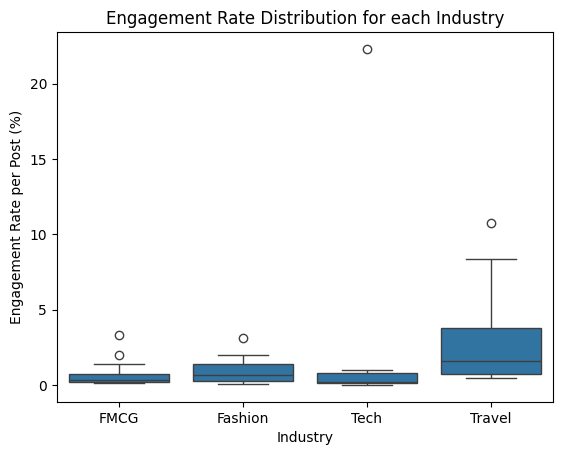

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x='INDUSTRY', y='AVERAGE ENG RATE/ POST', data=df3)

# Set titles and labels (optional, for clarity)
plt.title('Engagement Rate Distribution for each Industry')
plt.xlabel('Industry')
plt.ylabel('Engagement Rate per Post (%)')

# plt.figtext(0.5, -0.09, 
#     "Figure XX: Engagement rates per post across all industries. The travel industry showed \n"
#     "the highest engagement rates, while the tech and FMCG industries showed the lowest.\n",
#     ha="center", fontsize=9,wrap=True);
plt.show()

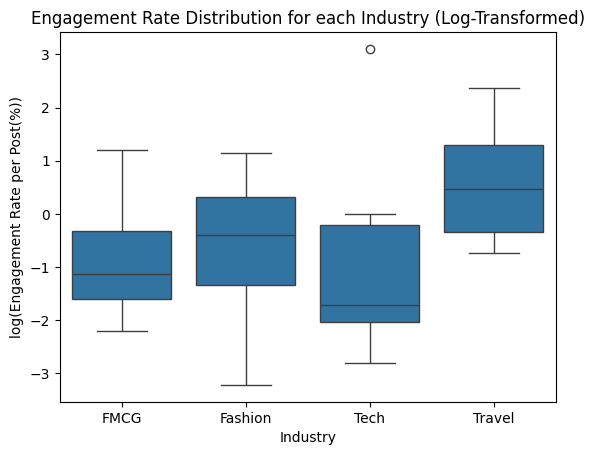

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x='INDUSTRY', y='log_engage', data=df7)

# Set titles and labels (optional, for clarity)
plt.title('Engagement Rate Distribution for each Industry (Log-Transformed)')
plt.xlabel('Industry')
plt.ylabel('log(Engagement Rate per Post(%))')

# Show the plot
plt.show()


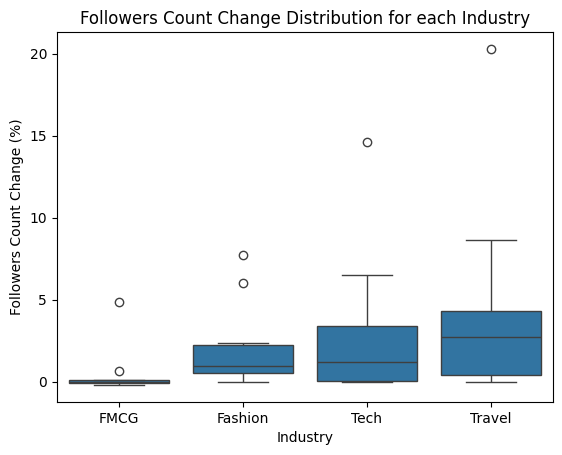

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot
sns.boxplot(x='INDUSTRY', y='PERCENT FOLLOWERS CHANGE', data=df3)

# Set titles and labels (optional, for clarity)
plt.title('Followers Count Change for each Industry')
plt.xlabel('Industry')
plt.ylabel('Followers Count Change (%)')

# Show the plot
plt.show()


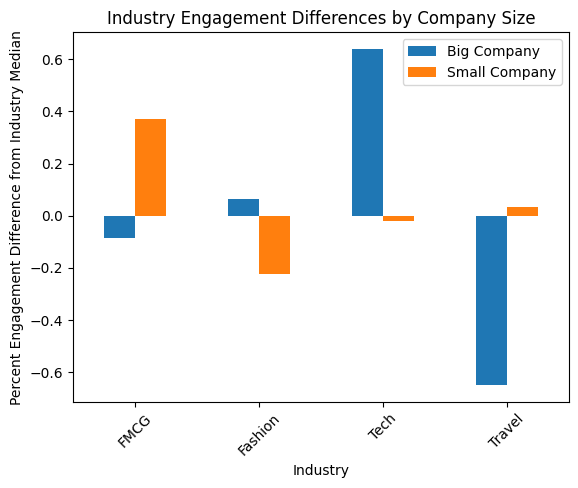

In [152]:
import matplotlib.pyplot as plt

engage = {'Big Company': list(df5.loc[df5['Size']=='Big', 'engage_diff']),
          'Small Company': list(df5.loc[df5['Size']=='Small', 'engage_diff'])}

industries = df5['INDUSTRY'].unique()

_df = pd.DataFrame(engage ,columns=['Big Company', 'Small Company'], index = industries)

_df.plot.bar()
# Set labels
plt.xlabel('Industry')
plt.ylabel("Percent Engagement Difference from Industry Median")
plt.title('Industry Engagement Differences by Company Size')
plt.xticks(rotation=45)

plt.show()

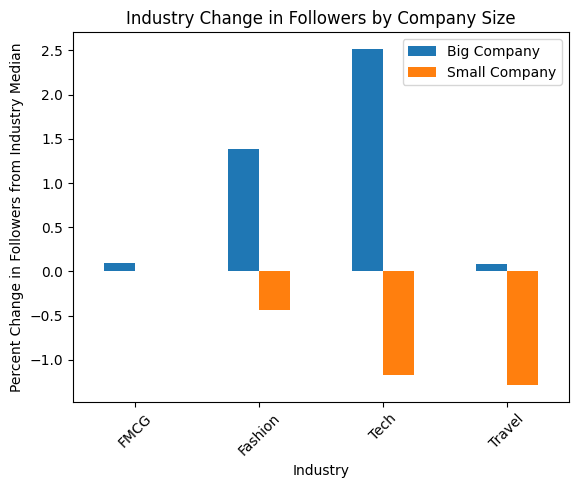

In [161]:
import matplotlib.pyplot as plt

followers = {'Big Company': list(df5.loc[df5['Size']=='Big', 'followers_diff']),
          'Small Company': list(df5.loc[df5['Size']=='Small', 'followers_diff'])}

industries = df5['INDUSTRY'].unique()

_df = pd.DataFrame(followers ,columns=['Big Company', 'Small Company'], index = industries)

_df.plot.bar()
# Set labels
plt.xlabel('Industry')
plt.ylabel("Percent Change in Followers from Industry Median")
plt.title('Industry Change in Followers by Company Size')
plt.xticks(rotation=45)

plt.show()

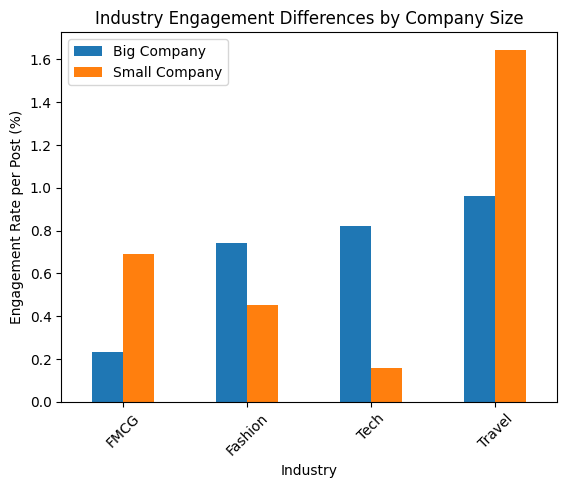

In [22]:
import matplotlib.pyplot as plt

engage = {'Big Company': list(df5.loc[df5['Size']=='Big', 'BIGSMALL AVG ENGAGEMENT / POST']),
          'Small Company': list(df5.loc[df5['Size']=='Small', 'BIGSMALL AVG ENGAGEMENT / POST'])}

industries = df5['INDUSTRY'].unique()

_df = pd.DataFrame(engage ,columns=['Big Company', 'Small Company'], index = industries)

_df.plot.bar()
# Set labels
plt.xlabel('Industry')
plt.ylabel("Engagement Rate per Post (%)")
plt.title('Industry Engagement Differences by Company Size')
plt.xticks(rotation=45)

plt.show()

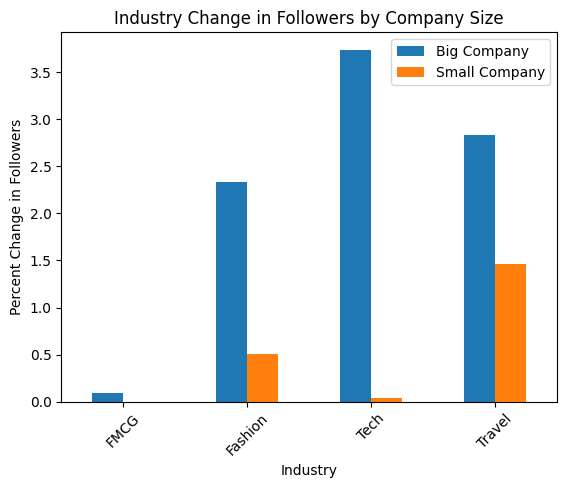

In [18]:
import matplotlib.pyplot as plt

followers = {'Big Company': list(df5.loc[df5['Size']=='Big', 'BIGSMALL PERCENT FOLLOWERS CHANGE']),
          'Small Company': list(df5.loc[df5['Size']=='Small', 'BIGSMALL PERCENT FOLLOWERS CHANGE'])}

industries = df5['INDUSTRY'].unique()

_df = pd.DataFrame(followers ,columns=['Big Company', 'Small Company'], index = industries)

_df.plot.bar()
# Set labels
plt.xlabel('Industry')
plt.ylabel("Percent Change in Followers")
plt.title('Industry Change in Followers by Company Size')
plt.xticks(rotation=45)

plt.show()